## **Detect contours**

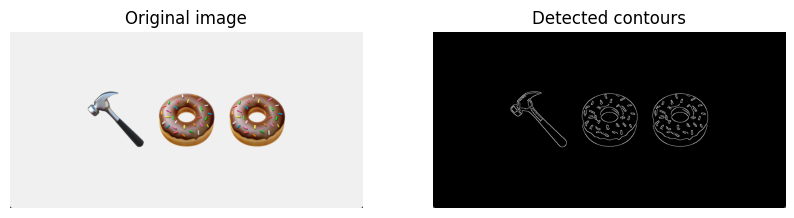

True

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("1-window-image.png")
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grey, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Detected contours")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

cv2.imwrite("2-detected-contours.png", edges)

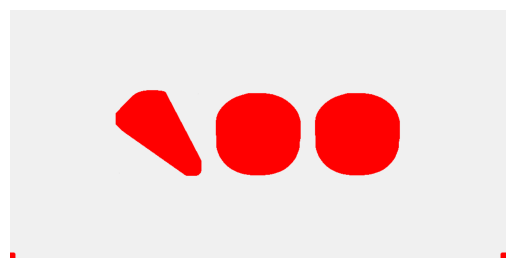

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("1-window-image.png", cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(image, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

# find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# image copy for drawing the contours
image_with_margin = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# outer contours with additional margin
for contour in contours:
    hull = cv2.convexHull(contour)
    mask = np.zeros_like(edges)
    cv2.drawContours(mask, [hull], -1, (255), thickness=cv2.FILLED) # red fill
    kernel = np.ones((15, 15), np.uint8) # dilatation kernel 
    expanded = cv2.dilate(mask, kernel, iterations=1)
    image_with_margin[expanded == 255] = (0, 0, 255)

# Convert image from BGR a RGB 
image_with_margin_rgb = cv2.cvtColor(image_with_margin, cv2.COLOR_BGR2RGB)

plt.imshow(image_with_margin_rgb)
plt.axis("off")
plt.show()

cv2.imwrite("3-outer-contours.png", image_with_margin)